<a href="">
    <img src="https://cdn-images-1.medium.com/max/1200/1*u16a0WbJeckSdi6kGD3gVA.jpeg" width = 400> 
</a>
<h1 align="center"><font size=5 color="DE5538">Breast Cancer</font></h1>

# Introduction
[Download kaggle Data Set here](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

### Table of Contents
<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3 color="black">

1. <a href="#item1">DataSet</a>

2. <a href="#item2">Relationship Visualization</a>    

3. <a href="#item3">Preprocessing</a>

4. <a href="#item3">Model</a>
</font>
</div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import Sklearn libraries
from sklearn.model_selection import GridSearchCV, train_test_split

# to make this notebook's output stable across runs
np.random.seed(2210)

# Set some options
pd.set_option("display.max_colwidth", 100)
sns.set_theme(style="whitegrid", palette="Set3")

# Set Matplotlib defaults
%matplotlib inline

# Load and explore the data

In [2]:
df = pd.read_csv("data.csv")
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [19]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


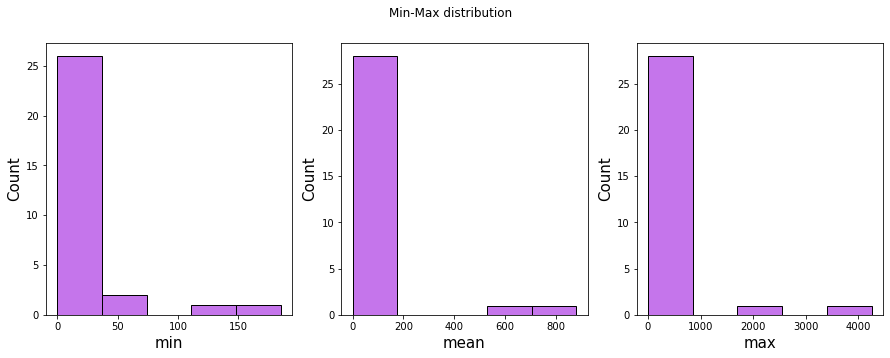

In [253]:
df_min_max = pd.concat(
    [df.describe().loc["min"], df.describe().loc["mean"], df.describe().loc["max"]],
    axis=1,
)

df_min_max.drop(df.columns[-1], inplace=True)
color = "#b753e6"
sns.reset_defaults()
sns.reset_orig()
sns.set_context(
    rc={
        "lines.linewidth": 5,
        #         "lines.markersize": 20,
        #         "axes.titlesize": 14,
        "axes.labelsize": 15,
        #         "xtick.labelsize": 8,
        #         "ytick.labelsize": 8,
        #         "xtick.major.size": 8,
        #         "ytick.major.size": 8,
    }
)

fig, axs = plt.subplots(ncols=3, figsize=(15, 5))
fig.suptitle("Min-Max distribution")
for i, col in enumerate(df_min_max.columns.to_list()):
    sns.histplot(df_min_max[col], bins=5, ax=axs[i], color="#b753e6", alpha=0.8)
plt.show()

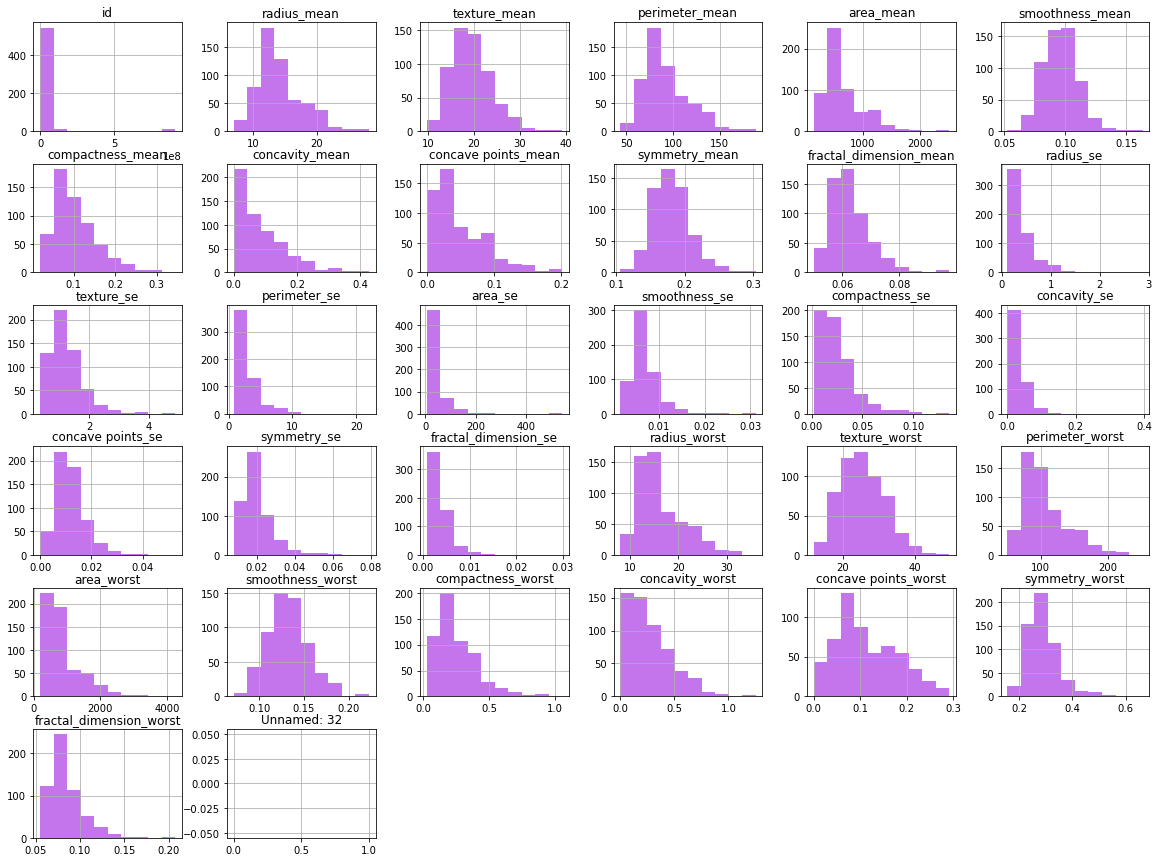

In [35]:
_ = df.hist(figsize=(20, 15), color="#b753e6", alpha=0.8)

In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df=df, title="Pandas Profiling")
profile.to_widgets()
profile.to_notebook_iframe()

profile.to_html("data_profile.html")

## Observations
1. All columns have value preset and of type Float except Unnamed:32
2. diaognisis class is the one we have to predict
3. All numerical values are positive, we can apply Box-Cox transformer to unskew the data
4. Unnamed:32 column is not required and can be dropped
5. Id column can be dropped

In [2]:
def get_data():
    df = pd.read_csv("data.csv")
    df.drop(["id", "Unnamed: 32"], axis=1, inplace=True)
    from sklearn.preprocessing import LabelEncoder

    le = LabelEncoder()
    # Return the dataframe
    le.fit(df["diagnosis"])
    df["diagnosis"] = le.transform(df["diagnosis"])

    # return dataframe
    return df, le


df, le = get_data()
X, y = df.drop("diagnosis", axis=1), df["diagnosis"].values
columns = X.columns.to_list()

X.shape, y.shape

((569, 30), (569,))

### Performannce with Scaling

In [21]:
import warnings 

warnings.filterwarnings('ignore')

In [24]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import Normalizer, PowerTransformer, StandardScaler
from mylib import helper, ml

X_ = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2)
df_clf_score, search_grids = ml.select_classifiers(X_train, y_train, X_test, y_test, is_binary=True)
df_clf_score

Running GridSearchCV for SGDClassifier
Running GridSearchCV for DecisionTreeClassifier
Running GridSearchCV for SVM
Running GridSearchCV for RandomForestClassifier
Running GridSearchCV for AdaBoostClassifier
Running GridSearchCV for GradinetBoostingClassifier
Running GridSearchCV for XGBClassifier
[20:06:36] WARNING: ../src/learner.cc:541: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:06:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:06:36] WARNING: ../src/learner.cc:541: 
Parameters: { verbose } might not be used.

  This may not be accurate due to 

,estimator,mean_val_score,accuracy,precision,recall,std_val_score,mean_fit_time,mean_score_time,params_x,params_y
0,LogisticRegression,0.975824,0.991228,0.979592,1.000000,0.004396,0.009805,0.000382,{},{}
1,SVM,0.964835,0.982456,0.979167,0.979167,0.016150,0.003131,0.001066,{},{}
3,AdaBoostClassifier,0.958242,0.973684,0.978723,0.958333,0.024474,0.149436,0.009709,{},{}
6,GradinetBoostingClassifier,0.949451,0.973684,0.959184,0.979167,0.037168,0.359988,0.001089,{},{}
2,XGBClassifier,0.962637,0.973684,0.941176,1.000000,0.014906,0.147345,0.011465,{},{}
4,SGDClassifier,0.951648,0.973684,0.941176,1.000000,0.022628,0.002295,0.000502,{},{}
5,RandomForestClassifier,0.951648,0.956140,0.921569,0.979167,0.022628,0.227355,0.010948,{},{}
7,DecisionTreeClassifier,0.927473,0.912281,0.827586,1.000000,0.028317,0.005101,0.000468,{},{}


In [18]:
pd.merge(df_clf_score, df_test, on=['estimator'])

,estimator,mean_val_score,std_val_score,mean_fit_time,mean_score_time,params_x,params_y,accuracy,precision,recall
0,LogisticRegression,0.980220,0.008223,0.007930,0.000349,{},{},0.956140,0.953488,0.931818
1,SVM,0.971429,0.008791,0.004692,0.001445,{},{},0.964912,0.954545,0.954545
2,SGDClassifier,0.967033,0.013900,0.001715,0.000384,{},{},0.973684,0.976744,0.954545
3,RandomForestClassifier,0.967033,0.009829,0.228563,0.011453,{},{},0.947368,0.931818,0.931818
4,XGBClassifier,0.960440,0.016447,0.176966,0.002797,{},{},0.956140,0.953488,0.931818
5,GradinetBoostingClassifier,0.958242,0.008223,0.281924,0.000774,{},{},0.947368,0.952381,0.909091
6,DecisionTreeClassifier,0.940659,0.016447,0.003977,0.000479,{},{},0.921053,0.906977,0.886364
7,AdaBoostClassifier,0.940659,0.028317,0.175072,0.010848,{},{},0.938596,0.930233,0.909091


#### Normalizer

In [6]:
X_ = Normalizer().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2)
df_clf_score, search_grids  = ml.select_classifiers(X_train, y_train, X_test, y_test, is_binary=True)
df_clf_score

Running GridSearchCV for SGDClassifier
Running GridSearchCV for DecisionTreeClassifier
Running GridSearchCV for SVM
Running GridSearchCV for RandomForestClassifier
Running GridSearchCV for AdaBoostClassifier
Running GridSearchCV for GradinetBoostingClassifier
Running GridSearchCV for XGBClassifier
[18:51:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:51:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:51:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set 

/opt/conda/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder i

[18:51:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:51:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Running GridSearchCV for LogisticRegression


,estimator,mean_test_score,std_test_score,params,mean_fit_time,mean_score_time,accuracy,precision,recall
0,AdaBoostClassifier,0.962637,0.019160,{},0.104887,0.006879,0.9825,0.9474,1.0000
1,GradinetBoostingClassifier,0.956044,0.019658,{},0.221814,0.000702,0.9737,0.9714,0.9444
2,XGBClassifier,0.953846,0.024474,{},0.065122,0.002661,0.9737,0.9459,0.9722
3,RandomForestClassifier,0.951648,0.028317,{},0.166524,0.008989,0.9737,0.9714,0.9444
4,DecisionTreeClassifier,0.931868,0.017582,{},0.003967,0.000489,0.9298,0.8684,0.9167
5,SVM,0.865934,0.025441,{},0.005113,0.001934,0.9474,1.0000,0.8333
6,SGDClassifier,0.863736,0.055861,{},0.002393,0.000347,0.9561,0.9697,0.8889
7,LogisticRegression,0.749451,0.028991,{},0.005341,0.000271,0.8333,1.0000,0.4722


#### Transformer

In [7]:
X_ = PowerTransformer(method='yeo-johnson').fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2)
df_clf_score, search_grids  = ml.select_classifiers(X_train, y_train, X_test, y_test, is_binary=True)
df_clf_score

/opt/conda/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Running GridSearchCV for SGDClassifier
Running GridSearchCV for DecisionTreeClassifier
Running GridSearchCV for SVM
Running GridSearchCV for RandomForestClassifier
Running GridSearchCV for AdaBoostClassifier
Running GridSearchCV for GradinetBoostingClassifier
Running GridSearchCV for XGBClassifier
[19:03:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:03:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:03:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set 

/opt/conda/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder i

[19:03:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:03:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:03:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Running GridSearchCV for LogisticRegression


,estimator,mean_test_score,std_test_score,params,mean_fit_time,mean_score_time,accuracy,precision,recall
0,SVM,0.978022,0.006950,{},0.002410,0.000783,0.9912,1.0000,0.9767
1,LogisticRegression,0.975824,0.010767,{},0.008278,0.000498,0.9912,1.0000,0.9767
2,SGDClassifier,0.964835,0.016150,{},0.001176,0.000260,0.9649,0.9333,0.9767
3,DecisionTreeClassifier,0.960440,0.016447,{},0.003334,0.000339,0.9649,0.9535,0.9535
4,RandomForestClassifier,0.960440,0.014906,{},0.168911,0.009140,0.9737,0.9762,0.9535
5,AdaBoostClassifier,0.958242,0.014579,{},0.101914,0.007002,0.9737,0.9762,0.9535
6,GradinetBoostingClassifier,0.956044,0.015541,{},0.215257,0.000667,0.9649,0.9535,0.9535
7,XGBClassifier,0.956044,0.017024,{},0.071084,0.003724,0.9737,0.9762,0.9535


#### View the information gain of each column

In [6]:
from sklearn.feature_selection import mutual_info_classif

info_gain = pd.Series(mutual_info_classif(X, y), index=X.columns)
info_gain.sort_values(ascending=False)[:5]

perimeter_worst         0.475893
area_worst              0.464704
radius_worst            0.451171
concave points_mean     0.440094
concave points_worst    0.437572
dtype: float64

#### Select best 20 columns with PowerTransformer

In [17]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

best_cols = SelectKBest(mutual_info_classif, 20)
X_best = best_cols.fit_transform(X, y)


X_ = PowerTransformer(method='yeo-johnson').fit_transform(X_best)
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2)
df_clf_score, search_grids  = ml.select_classifiers(X_train, y_train, X_test, y_test, is_binary=True)
df_clf_score

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass k=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/opt/conda/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Running GridSearchCV for SGDClassifier
Running GridSearchCV for DecisionTreeClassifier
Running GridSearchCV for SVM
Running GridSearchCV for RandomForestClassifier
Running GridSearchCV for AdaBoostClassifier
Running GridSearchCV for GradinetBoostingClassifier
Running GridSearchCV for XGBClassifier
[19:32:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:32:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:32:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set 

/opt/conda/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder i

[19:32:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:32:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Running GridSearchCV for LogisticRegression


,estimator,mean_test_score,std_test_score,params,mean_fit_time,mean_score_time,accuracy,precision,recall
0,SVM,0.964835,0.012815,{},0.001837,0.000630,1.0000,1.0000,1.0
1,LogisticRegression,0.964835,0.008223,{},0.006203,0.000315,1.0000,1.0000,1.0
2,SGDClassifier,0.953846,0.017582,{},0.001072,0.000256,0.9912,0.9778,1.0
3,AdaBoostClassifier,0.953846,0.008223,{},0.086280,0.006653,1.0000,1.0000,1.0
4,RandomForestClassifier,0.949451,0.016447,{},0.161028,0.009437,0.9912,0.9778,1.0
5,XGBClassifier,0.949451,0.014906,{},0.096458,0.003512,1.0000,1.0000,1.0
6,GradinetBoostingClassifier,0.945055,0.013900,{},0.147588,0.000624,0.9912,0.9778,1.0
7,DecisionTreeClassifier,0.909890,0.017582,{},0.002569,0.000290,0.9737,0.9362,1.0


#### Use PCA

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=15)

X_ = pca.fit_transform(X_best)
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2)
df_clf_score, search_grids  = ml.select_classifiers(X_train, y_train, X_test, y_test, is_binary=True)
df_clf_score

Running GridSearchCV for SGDClassifier
Running GridSearchCV for DecisionTreeClassifier
Running GridSearchCV for SVM
Running GridSearchCV for RandomForestClassifier
Running GridSearchCV for AdaBoostClassifier
Running GridSearchCV for GradinetBoostingClassifier
Running GridSearchCV for XGBClassifier
[19:35:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:35:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:35:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set 

/opt/conda/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder i

[19:35:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:35:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Running GridSearchCV for LogisticRegression


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

,estimator,mean_test_score,std_test_score,params,mean_fit_time,mean_score_time,accuracy,precision,recall
0,XGBClassifier,0.960440,0.023671,{},0.166790,0.002942,1.0000,1.0000,1.0000
1,GradinetBoostingClassifier,0.951648,0.005383,{},0.141819,0.000816,0.9912,1.0000,0.9756
2,RandomForestClassifier,0.949451,0.022628,{},0.175367,0.009477,0.9912,1.0000,0.9756
3,LogisticRegression,0.945055,0.015541,{},0.023680,0.000742,0.9912,1.0000,0.9756
4,AdaBoostClassifier,0.942857,0.012815,{},0.086477,0.006878,0.9649,0.9512,0.9512
5,SGDClassifier,0.923077,0.017024,{},0.001571,0.000427,0.9912,1.0000,0.9756
6,DecisionTreeClassifier,0.914286,0.017582,{},0.002545,0.000432,0.9298,0.9231,0.8780
7,SVM,0.912088,0.015541,{},0.002380,0.000903,0.9561,0.9737,0.9024


## Fine Tuning 
### Let's use best K columns transformer with SVM and Logistic Regression

In [26]:
X_ = PowerTransformer(method="yeo-johnson").fit_transform(X_best)
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

models = {
    "SVM": (
        SVC(),
        {
            "C": [0.1, 1, 10, 100, 1000],
            "gamma": [1, 0.1, 0.01, 0.001, 0.0001],
            "kernel": ["rbf", 'linear', 'sigmoid'],
        },
    ),
    "LogisticRegression": (
        LogisticRegression(),
        {
            "solver": ["newton-cg", "lbfgs", "liblinear"],
            "penalty": ['l1', 'l2'],
            "C": [100, 10, 1, 0.1, 0.01],
        },
    ),
}

from mylib.ml import EstimatorSelectHelper
select = EstimatorSelectHelper(models)
select.fit(X_train, y_train, cv=5, verbose=0, n_jobs=4)
df_score, search_grid = select.score_summary(X_test, y_test)
df_score

/opt/conda/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Running GridSearchCV for SVM
Running GridSearchCV for LogisticRegression


/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.96043956 0.95824176 0.95824176 0.95824176
        nan        nan 0.95824176 0.96483516 0.96483516 0.96483516
        nan        nan 0.96923077 0.97142857 0.97142857 0.97142857
        nan        nan 0.96043956 0.96263736 0.96263736 0.96263736
        nan        nan 0.88571429 0.94945055 0.94945055 0.95164835]
  warnings.warn(


,estimator,mean_test_score,std_test_score,params,mean_fit_time,mean_score_time,accuracy,precision,recall
0,SVM,0.973626,0.016447,"{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}",0.001671,0.000587,0.9912,1.0000,0.9773
1,SVM,0.973626,0.011207,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.002654,0.000882,0.9912,1.0000,0.9773
2,SVM,0.973626,0.014906,"{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}",0.001929,0.000544,0.9912,1.0000,0.9773
3,SVM,0.971429,0.013187,"{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}",0.001732,0.000483,0.9912,1.0000,0.9773
4,SVM,0.971429,0.013187,"{'C': 1000, 'gamma': 0.0001, 'kernel': 'sigmoid'}",0.002302,0.000617,0.9912,1.0000,0.9773
...,...,...,...,...,...,...,...,...,...
100,LogisticRegression,NaN,NaN,"{'C': 1, 'penalty': 'l1', 'solver': 'lbfgs'}",0.000224,0.000000,0.9649,0.9545,0.9545
101,LogisticRegression,NaN,NaN,"{'C': 0.1, 'penalty': 'l1', 'solver': 'newton-cg'}",0.000170,0.000000,0.9649,0.9545,0.9545
102,LogisticRegression,NaN,NaN,"{'C': 0.1, 'penalty': 'l1', 'solver': 'lbfgs'}",0.000378,0.000000,0.9649,0.9545,0.9545
103,LogisticRegression,NaN,NaN,"{'C': 0.01, 'penalty': 'l1', 'solver': 'newton-cg'}",0.000204,0.000000,0.9649,0.9545,0.9545


In [46]:
best_params = [ model.best_params_ for model in search_grid.values()]
mask = df_score['params'].apply(lambda x : x in best_params)
df_score[mask]

,estimator,mean_test_score,std_test_score,params,mean_fit_time,mean_score_time,accuracy,precision,recall
1,SVM,0.973626,0.011207,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.002654,0.000882,0.9912,1.0000,0.9773
77,LogisticRegression,0.971429,0.014906,"{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}",0.011185,0.000408,0.9649,0.9545,0.9545


In [51]:
final_model = search_grid['SVM'].best_estimator_
y_pred = final_model.predict(X_test)
y_test[:5], y_pred[:5]

(array([0, 1, 0, 1, 0]), array([0, 1, 0, 1, 0]))

In [154]:
from xgboost import XGBClassifier

model = XGBClassifier()
param_grid = [
    {
        "eta": np.linspace(0.2, 0.3, 2),
        "max_depth": range(4, 9),
        "min_child_weight": [1, 3, 5, 7],
#         "gamma": [0.0, 0.1, 0.2, 0.3, 0.4],
#         "colsample_bytree": [0.3, 0.4, 0.5, 0.7],
    }
]

model = fine_tune_model(model, param_grid, X_train, y_train, X_test, y_test)

cnf, accuracy = print_clasif_accuracy(model, X_train, y_train, X_test, y_test)
df_acc = df_acc.append(
    {"model": "XGBoost", "accuracy": accuracy, "transfomer": "StandardScalar"},
    ignore_index=True,
)
print("\n\n")

Performing Grid search for XGBClassifier ...


/opt/conda/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:02:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Time taken : 415.99s.
Best parameters : {'eta': 0.21999999999999997, 'max_depth': 4} with score 0.97
[16:02:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of the Model : 0.96


[[81  0]
 [ 4 29]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        81
           1       1.00      0.88      0.94        33

    accuracy                           0.96       114
   macro avg       0.98      0.94      0.96       114
weighted avg       0.97      0.96      0.96       114





